In [237]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV, LassoCV, Lasso, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

%matplotlib inline

# ---------------- 500ms, Perf on Attacked Binary ------------------ 

In [193]:
adata = pd.read_csv('Data/Attacked/500ms.txt', delim_whitespace=True)
adata = adata.drop(adata.columns[3], axis=1)
adata = adata.drop(adata.columns[3], axis=1)
adata = adata.drop(adata.columns[3], axis=1)
adata = adata.drop(adata.columns[3], axis=1)
adata = adata.drop(adata.columns[3], axis=1)
adata.columns = ['Time', 'Value', 'Type']
adata.head()

,Time,Value,Type
0,0.505896,5698587,cache-references
1,0.505896,1373690,cache-misses
2,0.505896,314784633,cycles
3,0.505896,309279292,instructions
4,0.505896,20824700,branches


In [194]:
instructions = adata[adata.Type.isin(['instructions'])]
cache_misses = adata[adata.Type.isin(['cache-misses'])]
cache_ref = adata[adata.Type.isin(['cache-references'])]
page_faults = adata[adata.Type.isin(['faults'])]
cycles = adata[adata.Type.isin(['cycles'])]
migrations = adata[adata.Type.isin(['migrations'])]
branches = adata[adata.Type.isin(['branches'])]
context = adata[adata.Type.isin(['context-switches'])]

cycles

,Time,Value,Type
2,0.505896,314784633,cycles
10,1.007363,833474840,cycles
18,1.508233,1314696599,cycles
26,2.009226,1367382516,cycles
34,2.509779,1370115742,cycles
42,3.010592,1388872468,cycles
50,3.511960,1395402092,cycles
58,4.013316,1374253287,cycles
66,4.513588,1357398808,cycles
74,5.014327,1360968219,cycles


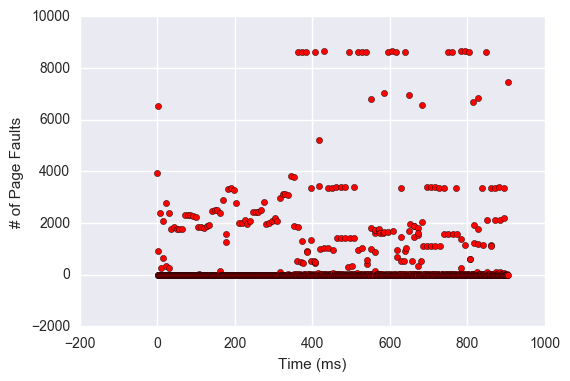

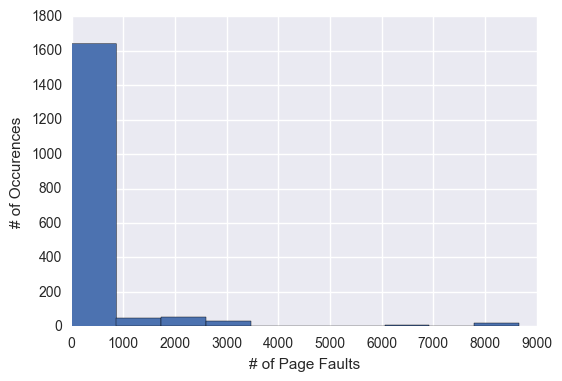

In [195]:
plt.scatter(page_faults.Time, page_faults.Value, c='r')
plt.xlabel('Time (ms)')
plt.ylabel('# of Page Faults')
plt.show()

plt.hist(page_faults.Value)
plt.xlabel('# of Page Faults')
plt.ylabel('# of Occurences')
plt.show()

In [196]:
miss_rate = (cache_misses.Value.mean()/cache_ref.Value.mean())
print "Cache miss rate: " 
print miss_rate

Cache miss rate: 
0.732756636677


# -------------------------Benchmark Data, ZeusMP, 75ms----------------------------

In [197]:
data = pd.read_csv('Data/Benchmark/500ms_ZeusMP.txt', delim_whitespace=True)
data = data.drop(data.columns[3], axis=1)
data = data.drop(data.columns[3], axis=1)
data = data.drop(data.columns[3], axis=1)
data = data.drop(data.columns[3], axis=1)
data = data.drop(data.columns[3], axis=1)
data.columns = ['Time', 'Value', 'Type']

In [198]:
ben_instructions = data[data.Type.isin(['instructions'])]
ben_cache_misses = data[data.Type.isin(['cache-misses'])]
ben_cache_ref = data[data.Type.isin(['cache-references'])]
ben_page_faults = data[data.Type.isin(['faults'])]
ben_cycles = data[data.Type.isin(['cycles'])]
ben_migrations = data[data.Type.isin(['migrations'])]
ben_branches = data[data.Type.isin(['branches'])]
ben_context = data[data.Type.isin(['context-switches'])]

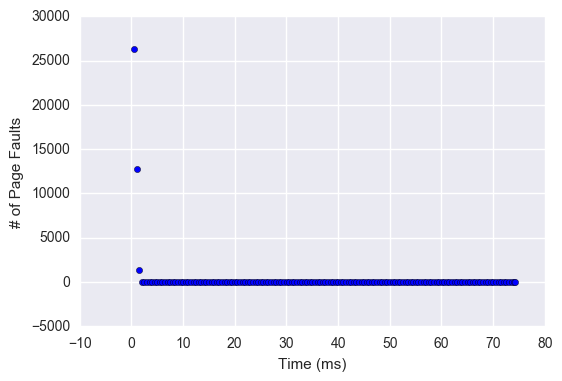

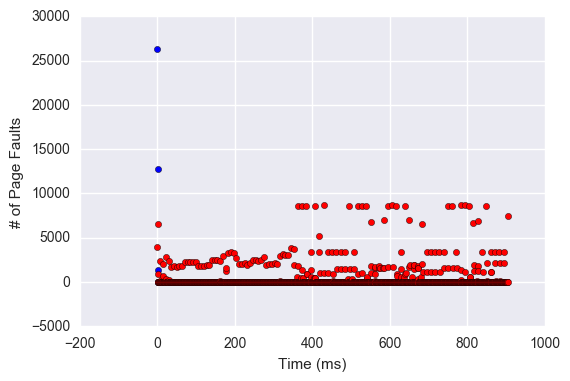

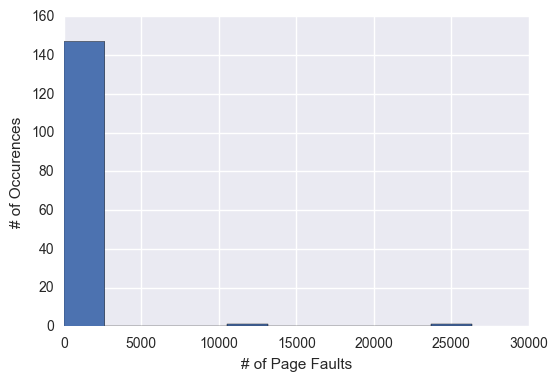

In [199]:
plt.scatter(ben_page_faults.Time, ben_page_faults.Value)
plt.xlabel('Time (ms)')
plt.ylabel('# of Page Faults')
plt.show()

plt.scatter(ben_page_faults.Time, ben_page_faults.Value)
plt.scatter(page_faults.Time, page_faults.Value, c='r')
plt.xlabel('Time (ms)')
plt.ylabel('# of Page Faults')
plt.show()

plt.hist(ben_page_faults.Value)
plt.xlabel('# of Page Faults')
plt.ylabel('# of Occurences')
plt.show()

In [200]:
miss_rate = (ben_cache_misses.Value.mean()/ben_cache_ref.Value.mean())
miss_std = ben_cache_misses.Value.std()
print "Cache miss rate: " 
print miss_rate

Cache miss rate: 
0.633169688669


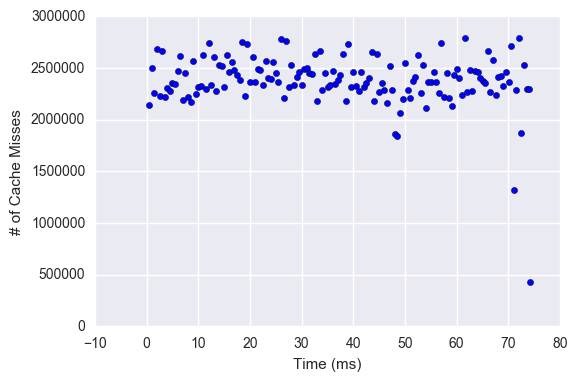

Mean: 
2380925.24161
STD: 
255928.051595


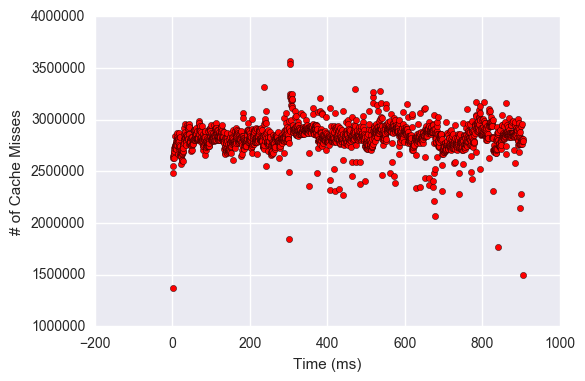

Mean: 
2831641.11517
STD: 
130623.328907


In [201]:
plt.scatter(ben_cache_misses.Time, ben_cache_misses.Value)
plt.xlabel('Time (ms)')
plt.ylabel('# of Cache Misses')
plt.show()

print "Mean: "
print ben_cache_misses.Value.mean()
print "STD: "
print ben_cache_misses.Value.std()

plt.scatter(cache_misses.Time, cache_misses.Value, c='r')
plt.xlabel('Time (ms)')
plt.ylabel('# of Cache Misses')
plt.show()

print "Mean: "
print cache_misses.Value.mean()
print "STD: "
print cache_misses.Value.std()

# ----------- Creating a Model ----------------

In [218]:
# First, we need to preprocess the data
instructions.index = range(len(instructions))
cache_misses.index = range(len(cache_misses))
cache_ref.index = range(len(cache_ref))
page_faults.index = range(len(page_faults))
cycles.index = range(len(cycles))
migrations.index = range(len(migrations))
branches.index = range(len(branches))
context.index = range(len(context))

ben_instructions.index = range(len(ben_instructions))
ben_cache_misses.index = range(len(ben_cache_misses))
ben_cache_ref.index = range(len(ben_cache_ref))
ben_page_faults.index = range(len(ben_page_faults))
ben_cycles.index = range(len(ben_cycles))
ben_migrations.index = range(len(ben_migrations))
ben_branches.index = range(len(ben_branches))
ben_context.index = range(len(ben_context))

ones = pd.DataFrame(np.ones(len(instructions)))
zeros = pd.DataFrame(np.zeros(len(ben_instructions)))

attack_data = pd.concat([instructions.Value, cache_misses.Value, cache_ref.Value, page_faults.Value, 
                        cycles.Value, migrations.Value, branches.Value, context.Value, ones], axis=1)

bench_data = pd.concat([ben_instructions.Value, ben_cache_misses.Value, ben_cache_ref.Value, ben_page_faults.Value, 
                        ben_cycles.Value, ben_migrations.Value, ben_branches.Value, ben_context.Value, zeros], axis=1)

total_data = pd.concat([attack_data, bench_data], axis=0)
total_data.columns = ['Instructions', 'Cache_misses', 'Cache_references', 'Page_Faults', 'Cycles', 'Migrations', 
                      'Branches', 'Context', 'Type']
total_data = total_data.drop('Migrations', axis=1)

# First, we'll shuffle the rows
total_data = total_data.sample(frac=1).reset_index(drop=True)
total_data

,Instructions,Cache_misses,Cache_references,Page_Faults,Cycles,Branches,Context,Type
0,294507282,2914361,3891242,0,1382739755,26835207,6,1.0
1,290809080,2892725,3917603,0,1367406592,26539151,3,1.0
2,290827213,2865452,3908352,1,1364809435,26491949,6,1.0
3,277393865,2737876,3715234,0,1305936362,25314025,7,1.0
4,274632115,2950675,3926302,0,1303834893,24766476,4,1.0
5,290221340,2762380,3795080,0,1360968962,26493999,4,1.0
6,290899954,2841003,3850202,0,1361726666,26547585,1,1.0
7,295903392,2949452,3933859,21,1389715675,27108995,14,1.0
8,293681220,2908817,3908266,0,1370249728,26793888,3,1.0
9,300091976,2850291,3829757,33,1402066222,27451101,8,1.0


In [219]:
msk = np.random.rand(len(total_data)) < 0.8
train = total_data[msk]
test = total_data[~msk]

X = total_data.ix[:, :7]
y = total_data.ix[:, 7]

X_train = train.ix[:,:7]
y_train = train.ix[:,7]

X_test = test.ix[:,:7]
y_test = test.ix[:,7]

In [220]:
model_ridge = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
pred = model_ridge.predict(X_test)

pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
pred_norm = pred_norm - pred_norm.min()

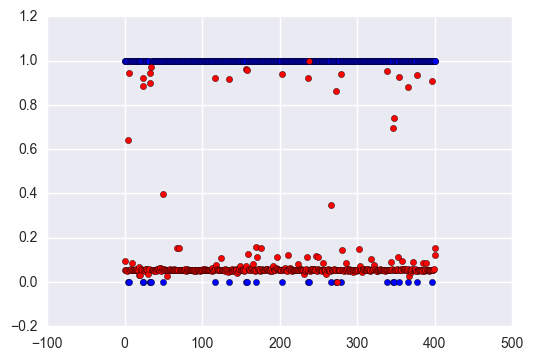

In [221]:
plt.scatter(range(0,len(X_test)), y_test)
plt.scatter(range(0,len(X_test)), pred_norm, c='r')
plt.show()

In [222]:
ridge_score = -cross_val_score(model_ridge, X_train, y_train, scoring="mean_squared_error")
print("Ridge Best RMSE: {}".format(np.sqrt(ridge_score).mean()))

Ridge Best RMSE: 184515.416457


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [223]:
model_lasso = LassoCV(alphas= [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
pred = model_lasso.predict(X_test)

pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
pred_norm = pred_norm - pred_norm.min()
pred_norm

array([ 0.99626765,  0.98166178,  0.97917935,  0.97167431,  0.30492302,
        0.04082294,  0.98149639,  0.97650793,  0.98439442,  0.97776151,
        0.98038016,  0.97729758,  0.98018858,  0.97381931,  0.97802735,
        0.98412381,  0.98602494,  0.97535998,  0.96534317,  0.95905622,
        0.92976301,  0.98602689,  0.97683108,  0.08668776,  0.11053629,
        0.9766389 ,  0.97706258,  0.98050253,  0.97457499,  0.97793368,
        0.95089045,  0.97983916,  0.04309172,  0.09540425,  0.01857034,
        0.98184062,  0.9824497 ,  0.97855329,  0.96908247,  0.97549257,
        0.98161416,  0.97152143,  0.98307209,  0.98060993,  0.97950174,
        0.96836053,  0.96370785,  0.97141507,  0.98580975,  0.52360178,
        0.9794    ,  0.98476918,  0.97691615,  0.97688394,  0.91815181,
        0.97770821,  0.98420822,  0.97965407,  0.98366095,  0.98451056,
        0.98170543,  0.97534813,  0.97656788,  0.95997655,  0.98086089,
        0.97981891,  0.97775568,  0.98646431,  0.9741915 ,  0.98

In [248]:
plt.scatter(range(0,20), y_test.ix[:20,:])
plt.scatter(range(0,20), pred_norm.ix[:20,:], c='r')
plt.show()

IndexingError: Too many indexers

In [225]:
lasso_score = -cross_val_score(model_lasso, X, y, scoring="mean_squared_error")
print("Lasso Best RMSE: {}".format(np.sqrt(lasso_score).mean()))

Lasso Best RMSE: 0.0317777471913


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


# K-Fold Cross Validations

In [232]:
# Let's use K-Fold Cross Validation

X = total_data.ix[:, :7]
y = total_data.ix[:, 7]

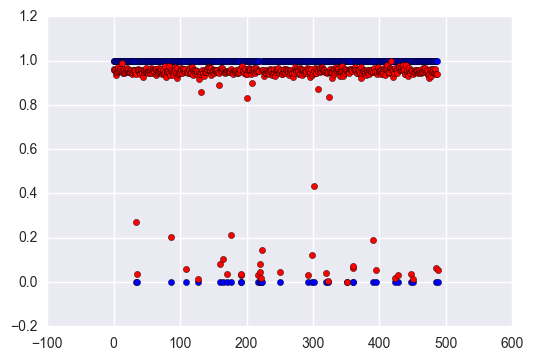

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0300087043691


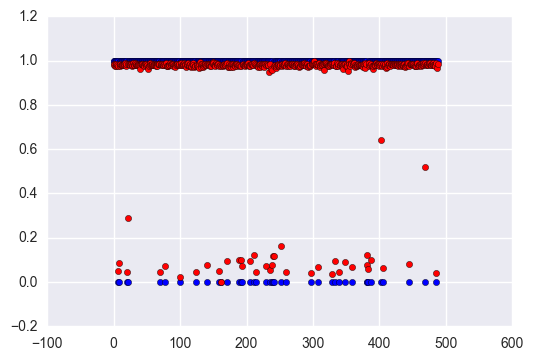

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0428012118475


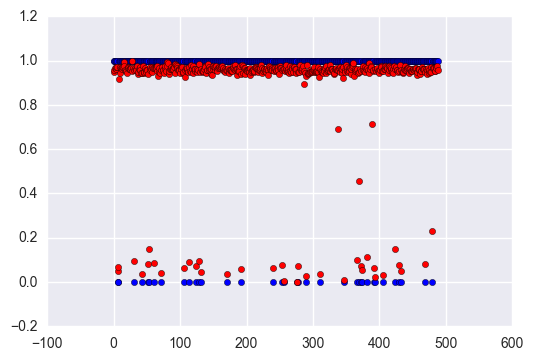

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0247713599222


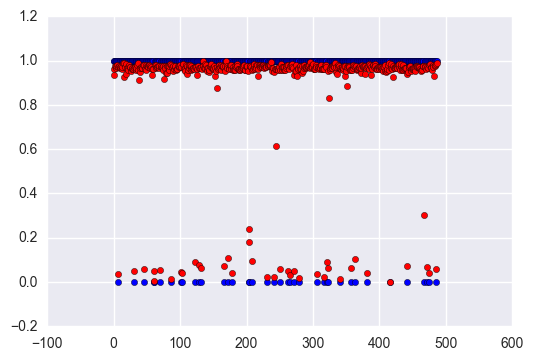

Lasso Best RMSE: 0.0243506225524
Average score: 
0.0336436460242


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [233]:
kf = KFold(n_splits=4)
total_score = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_lasso = LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
    
    pred = model_lasso.predict(X_test)
    pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
    pred_norm = pred_norm - pred_norm.min()

    plt.scatter(range(0,len(X_test)), y_test)
    plt.scatter(range(0,len(X_test)), pred_norm, c='r')
    plt.show()
    
    lasso_score = -cross_val_score(model_lasso, X_test, y_test, scoring="mean_squared_error")
    print("Lasso Best RMSE: {}".format(np.sqrt(lasso_score).mean()))
    total_score += np.sqrt(lasso_score.mean())
    
total_score /= 4
print "Average score: " 
print total_score

In [228]:
# Let's feature engineer the Page Faults, which should be the main feature

total_data1 = total_data
total_data1['Page_Faults'] = total_data['Page_Faults']**2

X = total_data1.ix[:, :7]
y = total_data1.ix[:, 7]

total_data

,Instructions,Cache_misses,Cache_references,Page_Faults,Cycles,Branches,Context,Type
0,294507282,2914361,3891242,0,1382739755,26835207,6,1.0
1,290809080,2892725,3917603,0,1367406592,26539151,3,1.0
2,290827213,2865452,3908352,1,1364809435,26491949,6,1.0
3,277393865,2737876,3715234,0,1305936362,25314025,7,1.0
4,274632115,2950675,3926302,0,1303834893,24766476,4,1.0
5,290221340,2762380,3795080,0,1360968962,26493999,4,1.0
6,290899954,2841003,3850202,0,1361726666,26547585,1,1.0
7,295903392,2949452,3933859,441,1389715675,27108995,14,1.0
8,293681220,2908817,3908266,0,1370249728,26793888,3,1.0
9,300091976,2850291,3829757,1089,1402066222,27451101,8,1.0


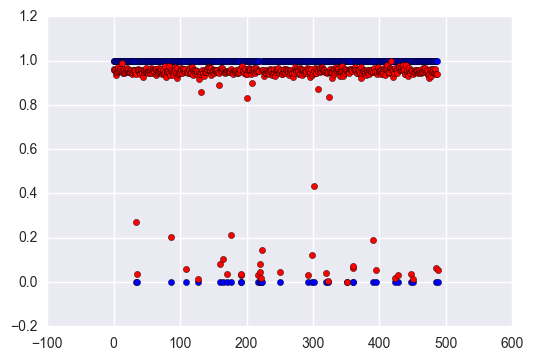

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0300087043691


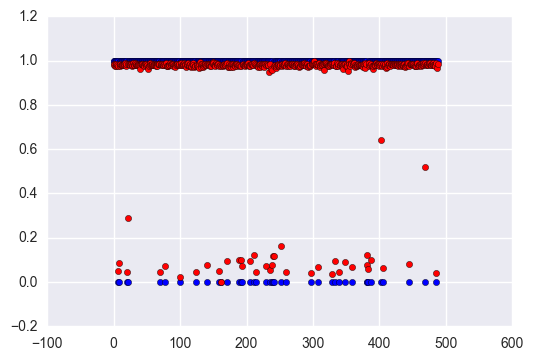

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0428012118475


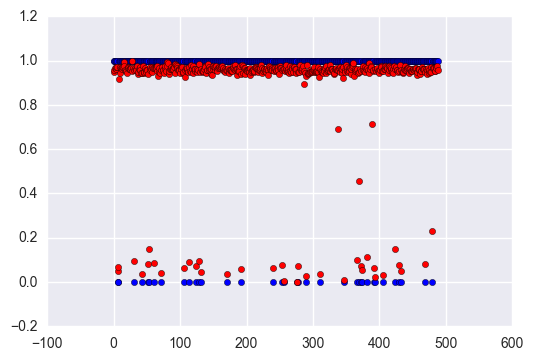

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0247713599222


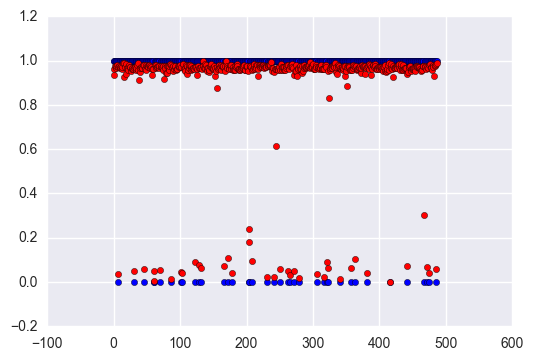

Lasso Best RMSE: 0.0243506225524

Average score: 
0.0336436460242


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [229]:
total_score = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_lasso = LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
    
    pred = model_lasso.predict(X_test)
    pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
    pred_norm = pred_norm - pred_norm.min()

    plt.scatter(range(0,len(X_test)), y_test)
    plt.scatter(range(0,len(X_test)), pred_norm, c='r')
    plt.show()
    
    lasso_score = -cross_val_score(model_lasso, X_test, y_test, scoring="mean_squared_error")
    print("Lasso Best RMSE: {}".format(np.sqrt(lasso_score).mean()))
    total_score += np.sqrt(lasso_score.mean())
    
total_score /= 4
print ""
print "Average score: " 
print total_score

In [230]:
# Let's also add a category if there are no page faults

bool_col = total_data['Page_Faults'] > 0
total_data1['page_bool'] = np.where(bool_col, 1, 0)

cols = total_data1.columns.tolist()
cols = cols[-1:] + cols[:-1]
total_data2 = total_data1[cols]

X = total_data2.ix[:, :8]
y = total_data2.ix[:, 8]

total_data2

,page_bool,Instructions,Cache_misses,Cache_references,Page_Faults,Cycles,Branches,Context,Type
0,0,294507282,2914361,3891242,0,1382739755,26835207,6,1.0
1,0,290809080,2892725,3917603,0,1367406592,26539151,3,1.0
2,1,290827213,2865452,3908352,1,1364809435,26491949,6,1.0
3,0,277393865,2737876,3715234,0,1305936362,25314025,7,1.0
4,0,274632115,2950675,3926302,0,1303834893,24766476,4,1.0
5,0,290221340,2762380,3795080,0,1360968962,26493999,4,1.0
6,0,290899954,2841003,3850202,0,1361726666,26547585,1,1.0
7,1,295903392,2949452,3933859,441,1389715675,27108995,14,1.0
8,0,293681220,2908817,3908266,0,1370249728,26793888,3,1.0
9,1,300091976,2850291,3829757,1089,1402066222,27451101,8,1.0


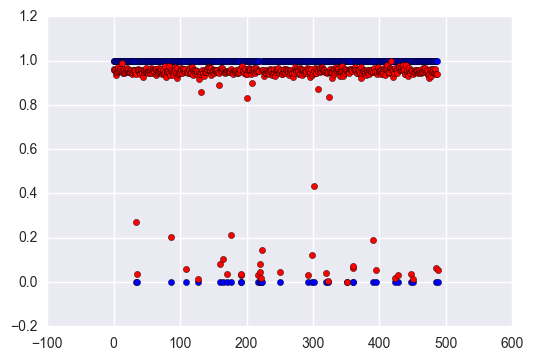

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0300087043691


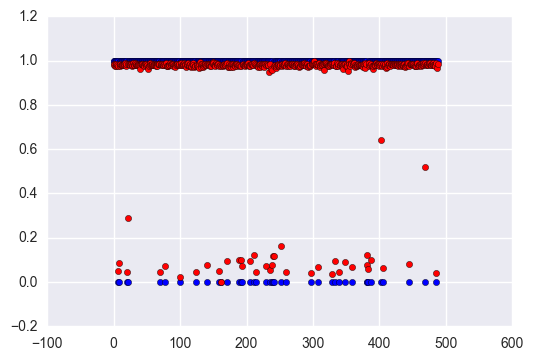

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0428012118475


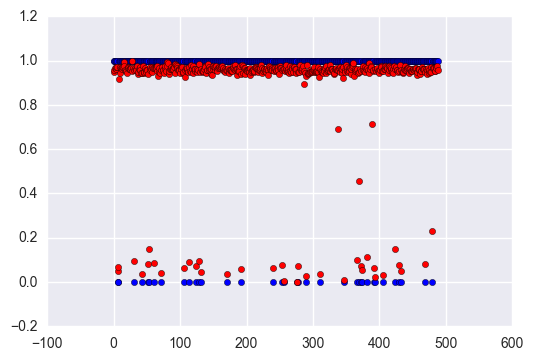

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Lasso Best RMSE: 0.0247713599222


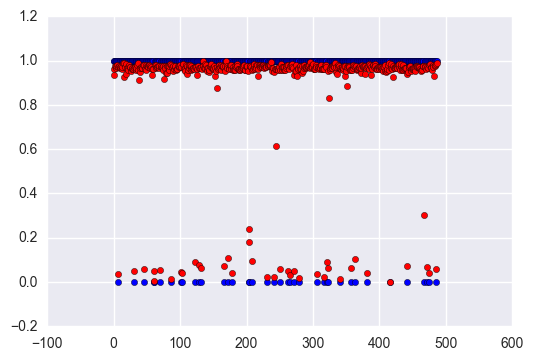

Lasso Best RMSE: 0.0243506225524

Average score: 
0.0336436460242


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [231]:
total_score = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_lasso = LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
    
    pred = model_lasso.predict(X_test)
    pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
    pred_norm = pred_norm - pred_norm.min()

    plt.scatter(range(0,len(X_test)), y_test)
    plt.scatter(range(0,len(X_test)), pred_norm, c='r')
    plt.show()
    
    lasso_score = -cross_val_score(model_lasso, X_test, y_test, scoring="mean_squared_error")
    print("Lasso Best RMSE: {}".format(np.sqrt(lasso_score).mean()))
    total_score += np.sqrt(lasso_score.mean())
    
total_score /= 4
print ""
print "Average score: " 
print total_score

In [235]:
X = total_data1.ix[:, :7]
y = total_data1.ix[:, 7]

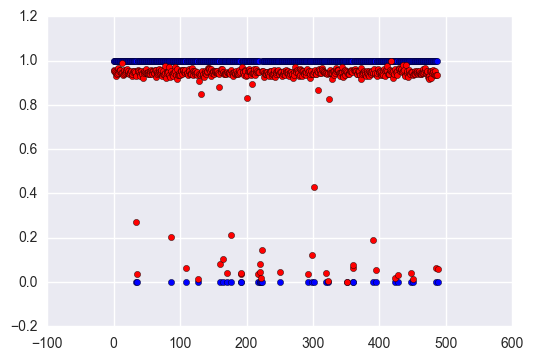

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Elastic Net Best RMSE: 0.0300087043691


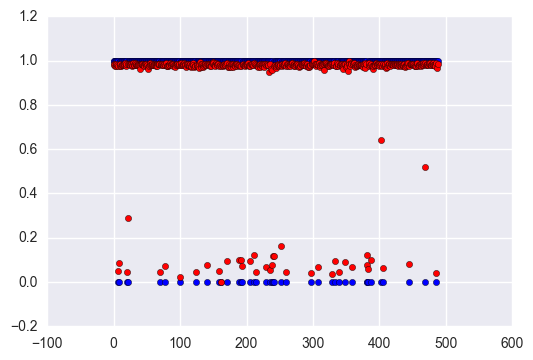

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Elastic Net Best RMSE: 0.0408969965195


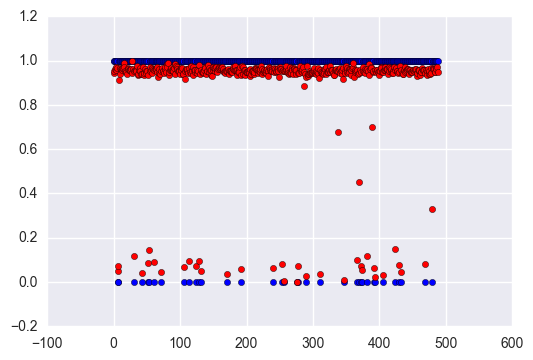

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Elastic Net Best RMSE: 0.0247714729223


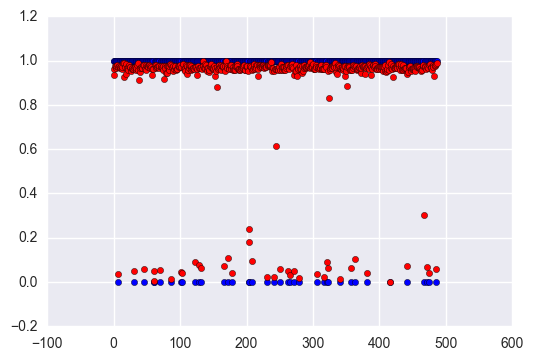

Elastic Net Best RMSE: 0.0254235241251

Average score: 
0.033328515347


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [239]:
total_score = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
    
    pred = model_net.predict(X_test)
    pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
    pred_norm = pred_norm - pred_norm.min()

    plt.scatter(range(0,len(X_test)), y_test)
    plt.scatter(range(0,len(X_test)), pred_norm, c='r')
    plt.show()
    
    net_score = -cross_val_score(model_net, X_test, y_test, scoring="mean_squared_error")
    print("Elastic Net Best RMSE: {}".format(np.sqrt(net_score).mean()))
    total_score += np.sqrt(net_score.mean())
    
total_score /= 4
print ""
print "Average score: " 
print total_score

In [243]:
X = total_data1.ix[:, :7]
y = total_data1.ix[:, 7]

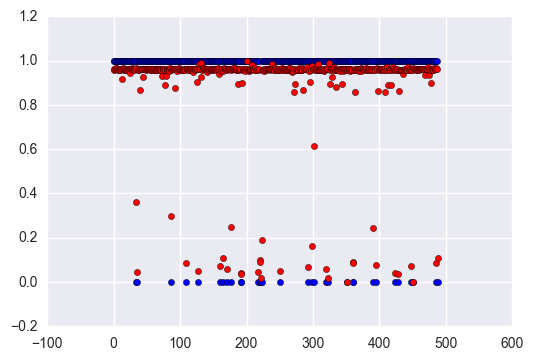

Ridge Best RMSE: 134.323118068


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


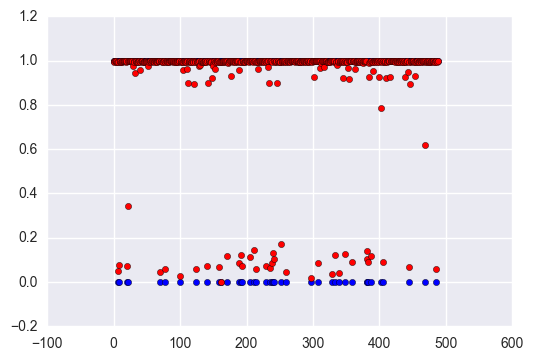

/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Ridge Best RMSE: 299412.22243


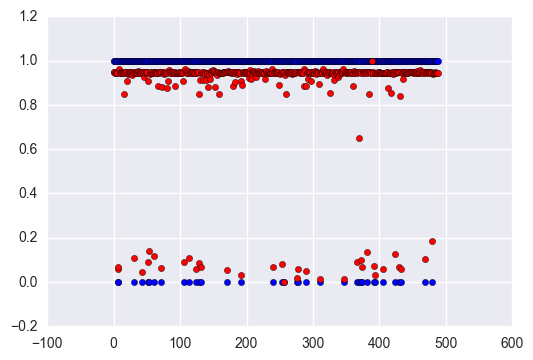

Ridge Best RMSE: 173.775316858


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


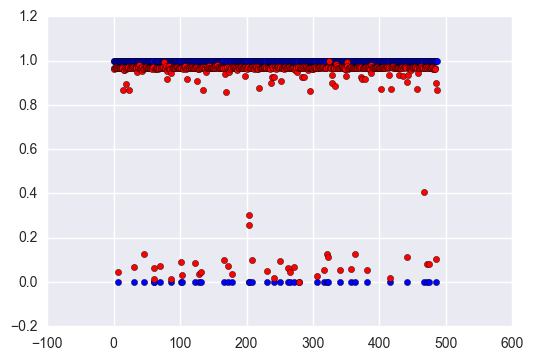

Ridge Best RMSE: 258354.226103

Average score: 
224286.277232


/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/JamesZhang/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [244]:
total_score = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
    
    pred = model.predict(X_test)
    pred_norm = (pred - pred.mean()) / (pred.max() - pred.min())
    pred_norm = pred_norm - pred_norm.min()

    plt.scatter(range(0,len(X_test)), y_test)
    plt.scatter(range(0,len(X_test)), pred_norm, c='r')
    plt.show()
    
    score = -cross_val_score(model, X_test, y_test, scoring="mean_squared_error")
    print("Ridge Best RMSE: {}".format(np.sqrt(score).mean()))
    total_score += np.sqrt(score.mean())
    
total_score /= 4
print ""
print "Average score: " 
print total_score